In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

In [6]:
train = pd.read_csv('Train/train_set_binary_encoding_sin_secondary_use.csv')

train.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,position_b1,position_b0,plan_configuration_b3,plan_configuration_b2,plan_configuration_b1,plan_configuration_b0,legal_ownership_status_b2,legal_ownership_status_b1,legal_ownership_status_b0,damage_grade
0,6,487,12198,2,30,6,5,1,1,0,...,1,0,0,0,0,1,0,0,1,3
1,8,900,2812,2,10,8,7,0,1,0,...,0,1,0,0,0,1,0,0,1,2
2,21,363,8973,2,10,5,5,0,1,0,...,1,0,0,0,0,1,0,0,1,3
3,22,418,10694,2,10,6,5,0,1,0,...,0,1,0,0,0,1,0,0,1,2
4,11,131,1488,3,30,8,9,1,0,0,...,0,1,0,0,0,1,0,0,1,3


In [7]:
X, y = train.iloc[:,:-1], train.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [8]:
cat = CatBoostClassifier(silent=True, random_seed=23)
cat.fit(X_train, y_train)

preds = cat.predict(X_test)
f1 = f1_score(y_test, preds, average='micro')
print("F1-Mean Score: %f" % (f1))

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

F1-Mean Score: 0.724641


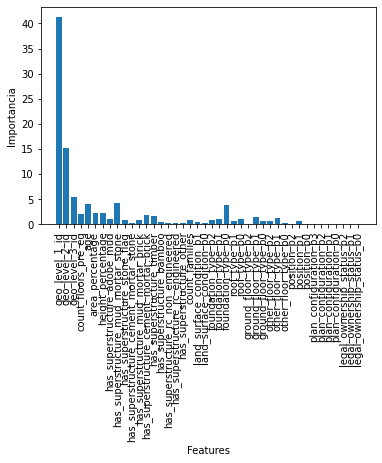

In [9]:
plt.bar(X_train.columns, cat.feature_importances_)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importancia')
plt.show()